In [1]:
import os
import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt


### Data load

In [2]:
url = 'https://raw.githubusercontent.com/JunetaeKim/DeepLearningClass/main/Dataset/energydata_complete.csv'
Energy = pd.read_csv(url)
Energy = Energy.drop(columns='date')


#### Data description

#### Data description: https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

#### The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. 

#####
##### date time year-month-day hour:minute:second
##### Appliances, energy use in Wh
##### lights, energy use of light fixtures in the house in Wh

##### T1, Temperature in kitchen area, in Celsius
##### RH_1, Humidity in kitchen area, in %
##### T2, Temperature in living room area, in Celsius
##### RH_2, Humidity in living room area, in %
##### T3, Temperature in laundry room area
##### RH_3, Humidity in laundry room area, in %
##### T4, Temperature in office room, in Celsius
##### RH_4, Humidity in office room, in %
##### T5, Temperature in bathroom, in Celsius
##### RH_5, Humidity in bathroom, in %
##### T6, Temperature outside the building (north side), in Celsius
##### RH_6, Humidity outside the building (north side), in %
##### T7, Temperature in ironing room , in Celsius
##### RH_7, Humidity in ironing room, in %
##### T8, Temperature in teenager room 2, in Celsius
##### RH_8, Humidity in teenager room 2, in %
##### T9, Temperature in parents room, in Celsius
##### RH_9, Humidity in parents room, in %
##### To, Temperature outside (from Chievres weather station), in Celsius
##### Pressure (from Chievres weather station), in mm Hg
##### RH_out, Humidity outside (from Chievres weather station), in %
##### Wind speed (from Chievres weather station), in m/s
##### Visibility (from Chievres weather station), in km
##### Tdewpoint (from Chievres weather station), Â°C
##### rv1, Random variable 1, nondimensional
##### rv2, Random variable 2, nondimensional
##### Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

#### Data visualization

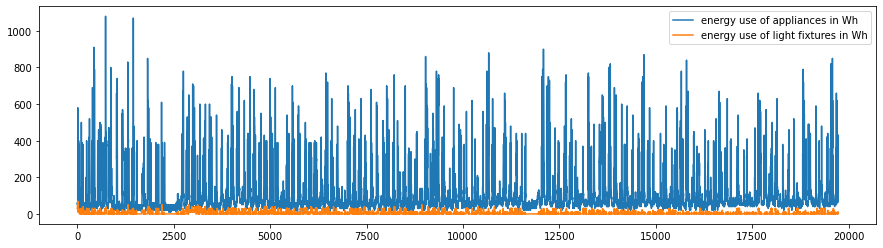

In [3]:
plt.figure(figsize=(15, 4))
plt.plot(Energy['Appliances'], label='energy use of appliances in Wh')
plt.plot(Energy['lights'], label='energy use of light fixtures in Wh')
plt.legend()


#### Converting pandas dataframe to numpy array type


In [4]:
npEnergy = Energy.values
npEnergy.shape

(19735, 28)

#### Transposing the matrix to sort the axes in order of features and observations.
#### tf.signal.frame operates on the last axis.

In [5]:
Energy_T =  np.transpose(npEnergy, (1,0))
Energy_T.shape

(28, 19735)

#### Performing data reconstruction through a sliding window

In [6]:
WindowSize = 24
Stride = 6
FrameDAta = tf.signal.frame(Energy_T, WindowSize, Stride)

#### Re-transposing the matrix to sort the axes in order of observations and features.

In [7]:
FrameDAta = np.transpose(FrameDAta, (1,2,0))

#### Data selection for input and output 

In [8]:
InpData = FrameDAta[:,:18, :] # Input features during the previous three hours
TargetData = FrameDAta[:,18:, :2] # Appliances and light usage during the next one hour

In [11]:
InpData.shape, TargetData.shape

((3286, 18, 28), (3286, 6, 2))